<a href="https://colab.research.google.com/github/Rohan-45-design/23BDS0276/blob/main/Temperature_Prediction_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Load the dataset
df = pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130886 entries, 0 to 130885
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    130886 non-null  int64  
 1   lat          130886 non-null  float64
 2   lon          130886 non-null  float64
 3   pressure     130886 non-null  float64
 4   temperature  130885 non-null  float64
 5   humidity     130885 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 6.0 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [5]:
# Check for missing values
print(df.isnull().sum())
#Replace the missing value in humidity with the mean value
humidity_mean = df['humidity'].mean()
df['humidity'].fillna(humidity_mean, inplace=True)

# Display summary statistics
print(df.describe())


sensor_id      0
lat            0
lon            0
pressure       0
temperature    1
humidity       1
dtype: int64
           sensor_id            lat            lon       pressure  \
count  130886.000000  130886.000000  130886.000000  130886.000000   
mean     2706.415789      42.680275      23.335148   94971.435963   
std       690.926507       0.025904       0.040205     680.686484   
min      1764.000000      42.622000      23.254000   92061.020000   
25%      2224.000000      42.664000      23.310000   94591.482500   
50%      2294.000000      42.685000      23.333000   95022.660000   
75%      3438.000000      42.694000      23.360000   95496.917500   
max      3982.000000      42.738000      23.419000   96196.300000   

         temperature       humidity  
count  130885.000000  130886.000000  
mean       25.100856      49.104571  
std         7.117915      22.624507  
min        11.940000       0.000000  
25%        19.210000      32.130000  
50%        24.050000      49.050000

<ipython-input-5-3403028492>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['humidity'].fillna(humidity_mean, inplace=True)


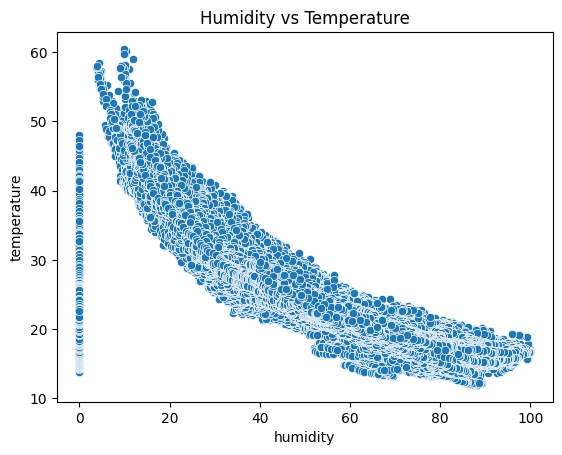

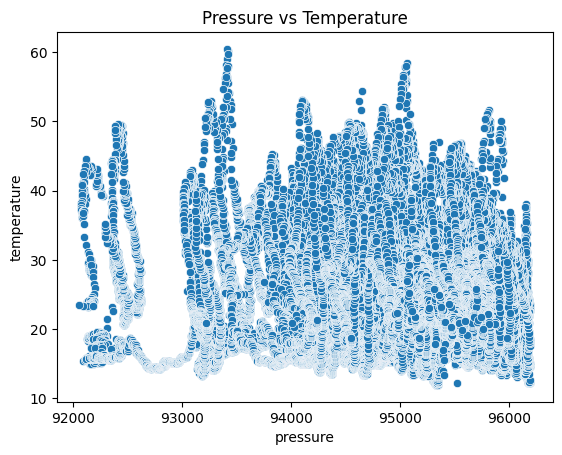

In [6]:
# Scatter plot to observe relationship
#Between humidity and temperature
sns.scatterplot(x='humidity', y='temperature', data=df)
plt.title('Humidity vs Temperature')
plt.show()
#Between pressure and temperature
sns.scatterplot(x='pressure',y='temperature',data =df)
plt.title('Pressure vs Temperature')
plt.show()

## Data Preprocessing

Mean Squared Error: 19.233084591369856
R-squared: 0.6236861326979116


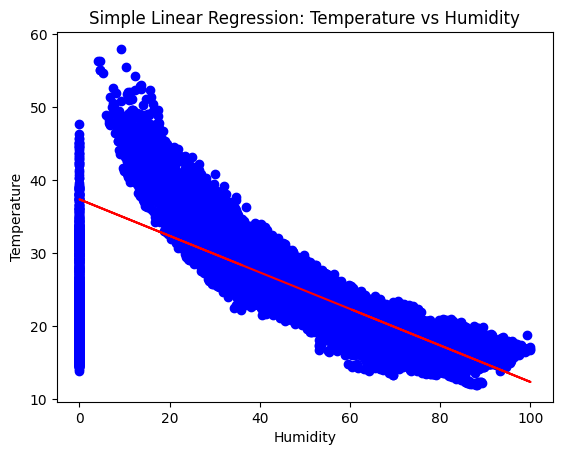

In [14]:
# Drop any rows with missing values
df = df.dropna()
# Define features and target
# Train-test split
X = df[['humidity']]
y = df[['temperature']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Simple Linear Regression: Temperature vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.show()

## Model Training

In [ ]:
# Linear Regression

# Predict



## Evaluation


In [ ]:
# Evaluate model performance

## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.
